# SimilarWeb Data Analysis & Visualization

This notebook analyzes website metrics using Apify's SimilarWeb scraper to extract comprehensive insights about website traffic, user demographics, competitor analysis, and more.

## Websites to Analyze:
- LinkedIn
- GitHub 
- Medium

## Key Metrics We'll Explore:
- Traffic sources breakdown
- Geographic distribution
- Competitor analysis
- User demographics
- Top keywords
- Social media distribution

## 1. Import Required Libraries

In [1]:
# Import required libraries for API access, data manipulation, and visualization
from apify_client import ApifyClient
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for better visualizations
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ All libraries imported successfully!")
print(f"📅 Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ All libraries imported successfully!
📅 Analysis date: 2025-06-29 15:33:37


## 2. Set Up Apify Client and Input Websites

In [2]:
# Initialize Apify Client with API token
client = ApifyClient("apify_api_D1WtSruXP25zCSTScrfBCjEPUZHsds058RFn")

# Define websites to analyze
websites_to_analyze = [
    # "https://www.linkedin.com",
    # "https://www.github.com", 
    # "https://www.medium.com"
    "https://www.ooredoo.tn/"
]

# Input configuration for the Similarweb scraper
run_input = {
    "websites": websites_to_analyze
}

print("🔧 Apify Client initialized successfully!")
print(f"📊 Websites to analyze: {len(websites_to_analyze)}")
for i, website in enumerate(websites_to_analyze, 1):
    print(f"  {i}. {website}")
print(f"\n🎯 Actor ID: heLi1j7hzjC2gFlIx")

🔧 Apify Client initialized successfully!
📊 Websites to analyze: 1
  1. https://www.ooredoo.tn/

🎯 Actor ID: heLi1j7hzjC2gFlIx


## 3. Run SimilarWeb Scraper and Retrieve Results

In [3]:
# Run the Similarweb scraper Actor
print("🚀 Starting SimilarWeb scraper...")
print("⏳ This may take a few minutes to complete...")

run = client.actor("heLi1j7hzjC2gFlIx").call(run_input=run_input)

# Retrieve all results from the dataset
results = list(client.dataset(run["defaultDatasetId"]).iterate_items())

print(f"✅ Scraping completed successfully!")
print(f"📊 Retrieved {len(results)} website results")
print(f"🆔 Run ID: {run.get('id', 'N/A')}")
print(f"📂 Dataset ID: {run['defaultDatasetId']}")

if results:
    print(f"\n📈 Data points per website: {len(results[0].keys()) if results[0] else 0}")
else:
    print("⚠️ No results retrieved!")

🚀 Starting SimilarWeb scraper...
⏳ This may take a few minutes to complete...


[apify.similarweb-scraper runId:CZfW0nU4Na2KNLhUG] -> Status: RUNNING, Message: 
[apify.similarweb-scraper runId:CZfW0nU4Na2KNLhUG] -> 2025-06-29T14:33:47.617Z ACTOR: Pulling Docker image of build JYiCBoRQ3RS1kpx41 from registry.
[apify.similarweb-scraper runId:CZfW0nU4Na2KNLhUG] -> 2025-06-29T14:33:47.619Z ACTOR: Creating Docker container.
[apify.similarweb-scraper runId:CZfW0nU4Na2KNLhUG] -> 2025-06-29T14:33:47.671Z ACTOR: Starting Docker container.
[apify.similarweb-scraper runId:CZfW0nU4Na2KNLhUG] -> 2025-06-29T14:33:47.924Z Will run command: xvfb-run -a -s "-ac -screen 0 1920x1080x24+32 -nolisten tcp" /bin/sh -c ./start_xvfb_and_run_cmd.sh && npm run start:prod --silent
[apify.similarweb-scraper runId:CZfW0nU4Na2KNLhUG] -> 2025-06-29T14:33:50.643Z INFO  System info {"apifyVersion":"3.4.2","apifyClientVersion":"2.12.5","crawleeVersion":"3.13.7","osType":"Linux","nodeVersion":"v20.19.2"}
[apify.similarweb-scraper runId:CZfW0nU4Na2KNLhUG] -> 2025-06-29T14:33:51.672Z INFO  Starting th

✅ Scraping completed successfully!
📊 Retrieved 1 website results
🆔 Run ID: CZfW0nU4Na2KNLhUG
📂 Dataset ID: uNuVIyS09AVTx7Kan

📈 Data points per website: 42


## 4. Explore and Debug API Response Structure

In [4]:
# Explore the structure of the API response
if results:
    print("🔍 Debug - First result structure:")
    print("=" * 50)
    first_result = results[0]
    
    for key, value in first_result.items():
        value_type = type(value).__name__
        if isinstance(value, dict):
            print(f"📦 {key}: {value_type} (keys: {list(value.keys())[:5]}{'...' if len(value.keys()) > 5 else ''})")
        elif isinstance(value, list):
            print(f"📋 {key}: {value_type} (length: {len(value)})")
        else:
            # Truncate long strings for display
            display_value = str(value)[:100] + "..." if len(str(value)) > 100 else value
            print(f"📄 {key}: {value_type} = {display_value}")
    
    print("\n" + "=" * 50)
    
    # Create a summary DataFrame of all websites
    summary_data = []
    for item in results:
        summary_data.append({
            'Domain': item.get('name', 'Unknown'),
            'Global Rank': item.get('globalRank', 'N/A'),
            'Total Visits': item.get('totalVisits', 0),
            'Company': item.get('companyName', 'N/A'),
            'Founded': item.get('companyYearFounded', 'N/A')
        })
    
    summary_df = pd.DataFrame(summary_data)
    print("📊 Quick Summary:")
    print(summary_df.to_string(index=False))
else:
    print("❌ No data available for analysis")

🔍 Debug - First result structure:
📄 url: str = https://similarweb.com/website/www.ooredoo.tn
📄 name: str = ooredoo.tn
📄 description: str = shop powered by prestashop
📄 icon: str = https://site-images.similarcdn.com/image?url=ooredoo.tn&t=2&s=1&h=ea99e43b74f5eb580c0e5f8e3a0753c96a...
📄 previewDesktop: str = https://site-images.similarcdn.com/image?url=ooredoo.tn&t=1&s=1&h=ea99e43b74f5eb580c0e5f8e3a0753c96a...
📄 previewMobile: str = https://site-images.similarcdn.com/image?url=ooredoo.tn&t=4&s=1&h=ea99e43b74f5eb580c0e5f8e3a0753c96a...
📄 globalRank: int = 43976
📄 countryRank: int = 55
📄 categoryRank: int = 430
📄 categoryId: str = computers_electronics_and_technology/search_engines
📄 companyYearFounded: int = 1973
📄 companyName: str = Ooredoo
📄 companyEmployeesMin: int = 1001
📄 companyEmployeesMax: int = 5000
📄 companyAnnualRevenueMin: int = 1000000000
📄 companyHeadquarterCountryCode: str = QA
📄 companyHeadquarterStateCode: NoneType = None
📄 companyHeadquarterCity: str = Doha
📄 avgVisitDur

## 5. Display Website Metrics

In [5]:
# Display detailed metrics for each website
def display_website_metrics(item):
    """Display formatted metrics for a single website"""
    domain = item.get("name", "Unknown Domain")
    
    print(f"\n🌐 Domain: {domain}")
    print(f"📊 Global Rank: #{item.get('globalRank', 'N/A'):,}" if item.get('globalRank') else "📊 Global Rank: N/A")
    print(f"🌍 Country Rank: #{item.get('countryRank', 'N/A'):,}" if item.get('countryRank') else "🌍 Country Rank: N/A")
    print(f"📈 Category Rank: #{item.get('categoryRank', 'N/A'):,}" if item.get('categoryRank') else "📈 Category Rank: N/A")
    print(f"🏢 Company: {item.get('companyName', 'N/A')}")
    print(f"📅 Founded: {item.get('companyYearFounded', 'N/A')}")
    
    # Employee and revenue information
    emp_min = item.get('companyEmployeesMin')
    emp_max = item.get('companyEmployeesMax')
    if emp_min and emp_max:
        print(f"👥 Employees: {emp_min:,} - {emp_max:,}")
    
    # Traffic metrics
    total_visits = item.get('totalVisits')
    if total_visits:
        print(f"🚀 Total Visits: {total_visits:,}")
    
    # Engagement metrics
    avg_duration = item.get('avgVisitDuration', 'N/A')
    pages_per_visit = item.get('pagesPerVisit', 'N/A')
    bounce_rate = item.get('bounceRate')
    
    print(f"⏱️ Avg Visit Duration: {avg_duration}")
    print(f"📄 Pages per Visit: {pages_per_visit}")
    if bounce_rate is not None:
        print(f"🔄 Bounce Rate: {bounce_rate:.2%}")
    
    print("=" * 60)

# Display metrics for all websites
print("📊 DETAILED WEBSITE METRICS")
print("=" * 60)

for item in results:
    display_website_metrics(item)

📊 DETAILED WEBSITE METRICS

🌐 Domain: ooredoo.tn
📊 Global Rank: #43,976
🌍 Country Rank: #55
📈 Category Rank: #430
🏢 Company: Ooredoo
📅 Founded: 1973
👥 Employees: 1,001 - 5,000
🚀 Total Visits: 1,112,520
⏱️ Avg Visit Duration: 00:04:53
📄 Pages per Visit: 4.52
🔄 Bounce Rate: 41.75%


## 6. Visualize Traffic Source Breakdown with Pie Charts

🎨 Creating Traffic Source Visualizations
📊 Chart saved as: ooredoo_tn_traffic_sources.png


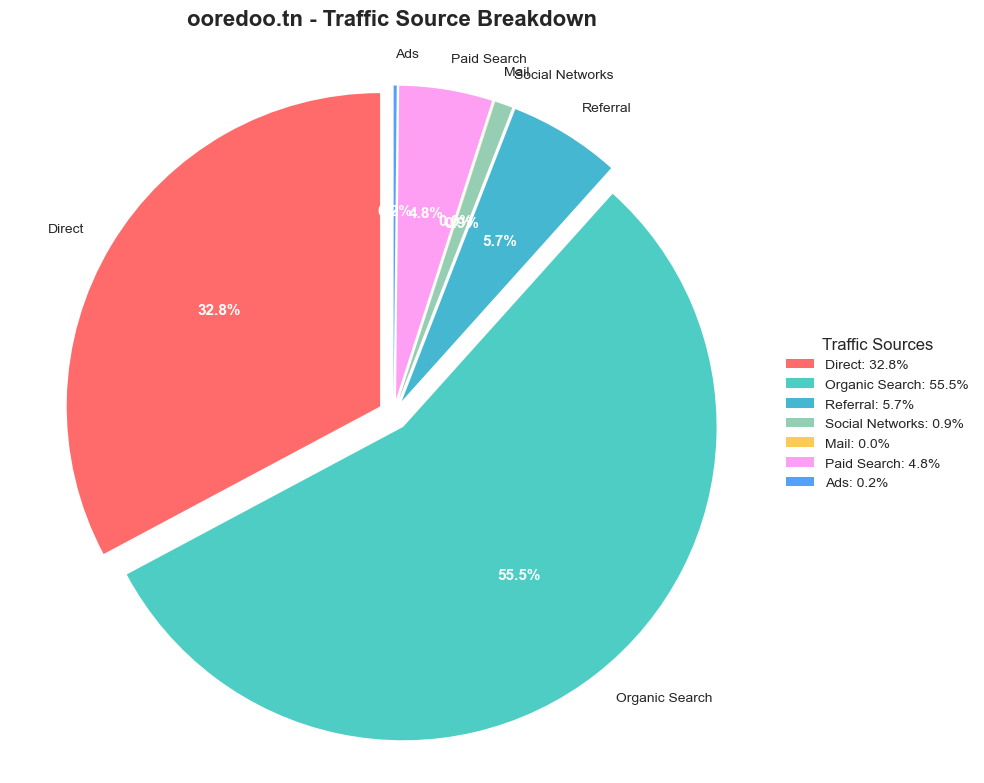


📊 ooredoo.tn - Traffic Sources Breakdown:
  Direct: 32.80%
  Organic Search: 55.55%
  Referral: 5.75%
  Social Networks: 0.92%
  Mail: 0.02%
  Paid Search: 4.80%
  Ads: 0.16%



In [6]:
# Create pie charts for traffic source breakdown
def create_traffic_pie_chart(item, save_charts=True):
    """Create a pie chart for traffic source breakdown"""
    domain = item.get("name", "Unknown Domain")
    traffic_sources_data = item.get("trafficSources", {})
    
    if not traffic_sources_data:
        print(f"⚠️ No traffic source data available for {domain}")
        return
    
    # Extract traffic sources
    traffic_sources = {
        "Direct": traffic_sources_data.get("directVisitsShare", 0),
        "Organic Search": traffic_sources_data.get("organicSearchVisitsShare", 0),
        "Referral": traffic_sources_data.get("referralVisitsShare", 0),
        "Social Networks": traffic_sources_data.get("socialNetworksVisitsShare", 0),
        "Mail": traffic_sources_data.get("mailVisitsShare", 0),
        "Paid Search": traffic_sources_data.get("paidSearchVisitsShare", 0),
        "Ads": traffic_sources_data.get("adsVisitsShare", 0)
    }
    
    # Filter out zero values
    valid_traffic_sources = {k: v for k, v in traffic_sources.items() if v > 0}
    
    if not valid_traffic_sources:
        print(f"⚠️ No valid traffic source data for {domain}")
        return
    
    # Create the pie chart
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Custom colors for better visualization
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF']
    
    wedges, texts, autotexts = ax.pie(
        valid_traffic_sources.values(), 
        labels=valid_traffic_sources.keys(),
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(valid_traffic_sources)],
        explode=[0.05] * len(valid_traffic_sources)  # Slightly separate slices
    )
    
    # Enhance text appearance
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    
    ax.set_title(f'{domain} - Traffic Source Breakdown', fontsize=16, fontweight='bold', pad=20)
    plt.axis('equal')
    
    # Add a legend
    ax.legend(wedges, [f'{k}: {v:.1%}' for k, v in valid_traffic_sources.items()],
              title="Traffic Sources",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.tight_layout()
    
    if save_charts:
        chart_filename = f"{domain.replace('.', '_')}_traffic_sources.png"
        plt.savefig(chart_filename, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"📊 Chart saved as: {chart_filename}")
    
    plt.show()
    
    # Print detailed breakdown
    print(f"\n📊 {domain} - Traffic Sources Breakdown:")
    for source, share in valid_traffic_sources.items():
        print(f"  {source}: {share:.2%}")
    print()

# Create traffic charts for all websites
print("🎨 Creating Traffic Source Visualizations")
print("=" * 50)

for item in results:
    create_traffic_pie_chart(item, save_charts=True)

## 7. Display Top Countries by Traffic Share

🗺️ GEOGRAPHIC TRAFFIC ANALYSIS

🌍 ooredoo.tn - Top Countries by Traffic Share:
--------------------------------------------------
   1. TN: 94.30% 📉 (-5.36%)
   2. FR: 1.30% 📉 (-26.32%)
   3. QA: 0.73% 📈 (+69.20%)
   4. DE: 0.71% 📈 (+372.20%)
   5. DZ: 0.63% 📉 (-23.99%)


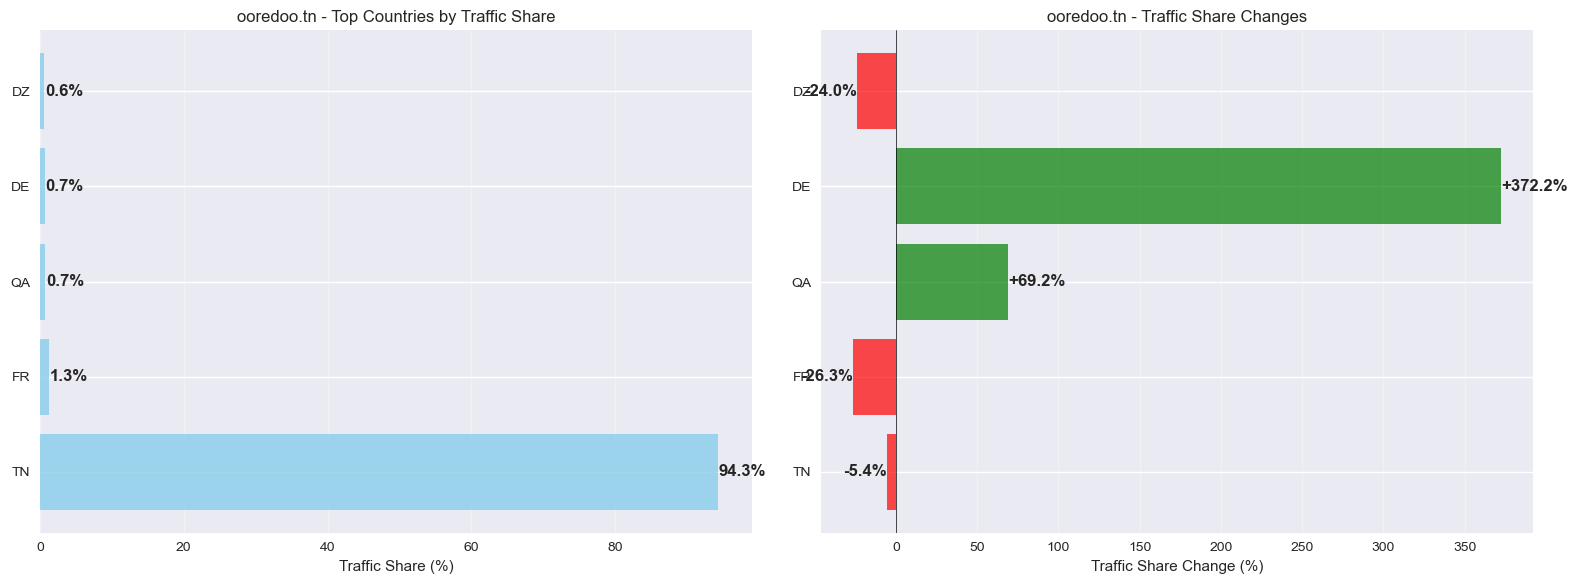

In [7]:
# Analyze geographic distribution of traffic
def analyze_geographic_distribution(item):
    """Analyze and visualize geographic distribution of website traffic"""
    domain = item.get("name", "Unknown Domain")
    top_countries = item.get("topCountries", [])
    
    if not top_countries:
        print(f"⚠️ No geographic data available for {domain}")
        return
    
    print(f"\n🌍 {domain} - Top Countries by Traffic Share:")
    print("-" * 50)
    
    # Prepare data for visualization
    countries = []
    shares = []
    changes = []
    
    for i, country in enumerate(top_countries[:10], 1):  # Top 10 countries
        country_code = country.get('countryAlpha2Code', 'Unknown')
        visits_share = country.get('visitsShare', 0)
        share_change = country.get('visitsShareChange', 0)
        
        countries.append(country_code)
        shares.append(visits_share)
        changes.append(share_change)
        
        # Display with change indicator
        change_indicator = "📈" if share_change > 0 else "📉" if share_change < 0 else "➡️"
        print(f"  {i:2d}. {country_code}: {visits_share:.2%} {change_indicator} ({share_change:+.2%})")
    
    # Create bar chart for top countries
    if countries and shares:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Bar chart for traffic share
        bars1 = ax1.barh(countries, [s*100 for s in shares], color='skyblue', alpha=0.8)
        ax1.set_xlabel('Traffic Share (%)')
        ax1.set_title(f'{domain} - Top Countries by Traffic Share')
        ax1.grid(axis='x', alpha=0.3)
        
        # Add percentage labels on bars
        for i, (bar, share) in enumerate(zip(bars1, shares)):
            ax1.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                    f'{share:.1%}', va='center', fontweight='bold')
        
        # Bar chart for traffic share changes
        colors = ['green' if change > 0 else 'red' if change < 0 else 'gray' for change in changes]
        bars2 = ax2.barh(countries, [c*100 for c in changes], color=colors, alpha=0.7)
        ax2.set_xlabel('Traffic Share Change (%)')
        ax2.set_title(f'{domain} - Traffic Share Changes')
        ax2.grid(axis='x', alpha=0.3)
        ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        
        # Add change labels on bars
        for i, (bar, change) in enumerate(zip(bars2, changes)):
            if change != 0:
                ax2.text(bar.get_width() + (0.1 if change > 0 else -0.1), 
                        bar.get_y() + bar.get_height()/2, 
                        f'{change:+.1%}', va='center', fontweight='bold',
                        ha='left' if change > 0 else 'right')
        
        plt.tight_layout()
        plt.show()
    
    print()

# Analyze geographic distribution for all websites
print("🗺️ GEOGRAPHIC TRAFFIC ANALYSIS")
print("=" * 60)

for item in results:
    analyze_geographic_distribution(item)

## 8. Display Top Keywords

🔍 KEYWORD ANALYSIS

🔍 ooredoo.tn - Top Keywords Analysis:
--------------------------------------------------
   1. ooredoo
      Volume: 60,440 | Est. Value: $21,770 | CPC: $0.74
   2. oreedo
      Volume: 3,030 | Est. Value: $3,620 | CPC: $0.99
   3. ooredoo tunisie
      Volume: 2,270 | Est. Value: $2,720 | CPC: $0.19
   4. ooredoo tn
      Volume: 1,640 | Est. Value: $1,650 | CPC: $0.08
   5. ooredoo recharge
      Volume: 5,380 | Est. Value: $1,400 | CPC: $1.35


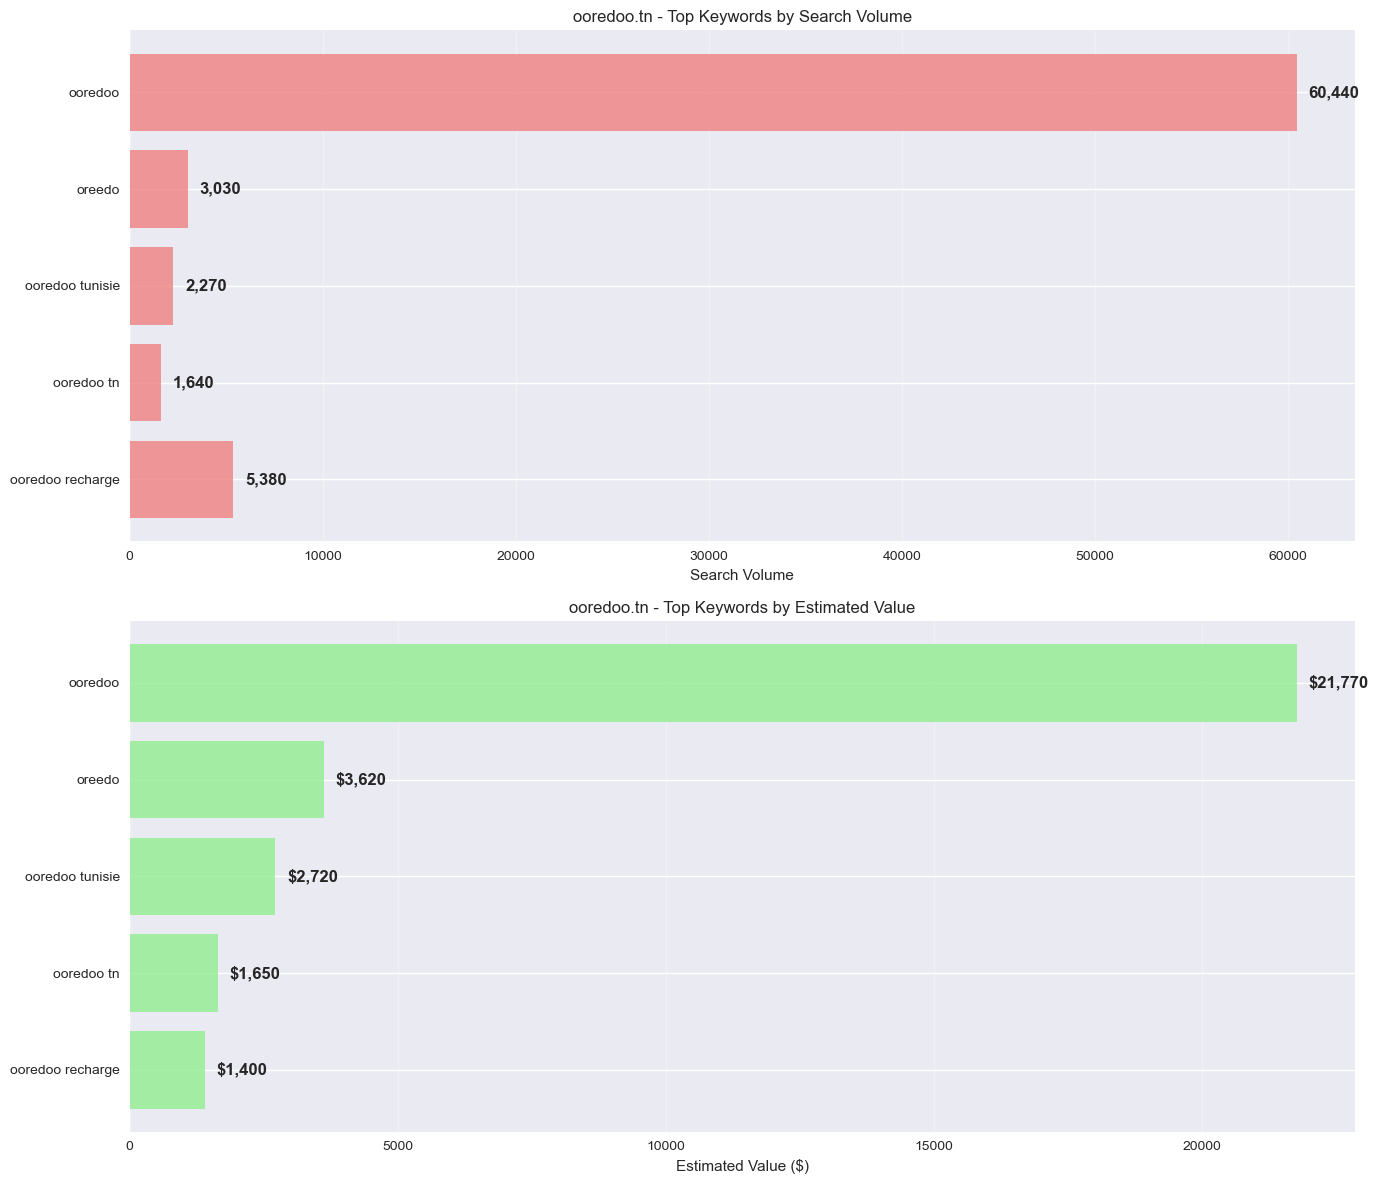


📊 Traffic Distribution:
  Organic: 92.16%
  Paid: 7.84%



In [8]:
# Analyze top keywords driving traffic
def analyze_top_keywords(item):
    """Analyze and visualize top keywords for a website"""
    domain = item.get("name", "Unknown Domain")
    top_keywords = item.get("topKeywords", [])
    
    if not top_keywords:
        print(f"⚠️ No keyword data available for {domain}")
        return
    
    print(f"\n🔍 {domain} - Top Keywords Analysis:")
    print("-" * 50)
    
    # Prepare data for visualization
    keywords = []
    volumes = []
    values = []
    
    for i, keyword in enumerate(top_keywords[:10], 1):  # Top 10 keywords
        name = keyword.get('name', 'Unknown')
        volume = keyword.get('volume', 0)
        estimated_value = keyword.get('estimatedValue', 0)
        cpc = keyword.get('cpc', 0)
        
        keywords.append(name)
        volumes.append(volume)
        values.append(estimated_value)
        
        # Display keyword information
        cpc_text = f"${cpc:.2f}" if cpc else "N/A"
        print(f"  {i:2d}. {name}")
        print(f"      Volume: {volume:,} | Est. Value: ${estimated_value:,} | CPC: {cpc_text}")
    
    # Create visualizations
    if keywords and volumes:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
        
        # Search volume chart
        bars1 = ax1.barh(keywords[::-1], volumes[::-1], color='lightcoral', alpha=0.8)
        ax1.set_xlabel('Search Volume')
        ax1.set_title(f'{domain} - Top Keywords by Search Volume')
        ax1.grid(axis='x', alpha=0.3)
        
        # Add volume labels
        for bar, volume in zip(bars1, volumes[::-1]):
            ax1.text(bar.get_width() + max(volumes) * 0.01, 
                    bar.get_y() + bar.get_height()/2, 
                    f'{volume:,}', va='center', fontweight='bold')
        
        # Estimated value chart
        bars2 = ax2.barh(keywords[::-1], values[::-1], color='lightgreen', alpha=0.8)
        ax2.set_xlabel('Estimated Value ($)')
        ax2.set_title(f'{domain} - Top Keywords by Estimated Value')
        ax2.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars2, values[::-1]):
            ax2.text(bar.get_width() + max(values) * 0.01, 
                    bar.get_y() + bar.get_height()/2, 
                    f'${value:,}', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    # Calculate organic vs paid traffic ratio
    organic_traffic = item.get('organicTraffic', 0)
    paid_traffic = item.get('paidTraffic', 0)
    
    if organic_traffic or paid_traffic:
        print(f"\n📊 Traffic Distribution:")
        print(f"  Organic: {organic_traffic:.2%}")
        print(f"  Paid: {paid_traffic:.2%}")
    
    print()

# Analyze keywords for all websites
print("🔍 KEYWORD ANALYSIS")
print("=" * 60)

for item in results:
    analyze_top_keywords(item)

## 9. Display Social Network Distribution

📱 SOCIAL MEDIA ANALYSIS

📱 github.com - Social Network Distribution:
--------------------------------------------------
  1. Youtube: 45.60%
  2. Reddit: 35.17%
  3. Linkedin: 6.15%
  4. X-twitter: 6.11%
  5. Facebook: 2.12%


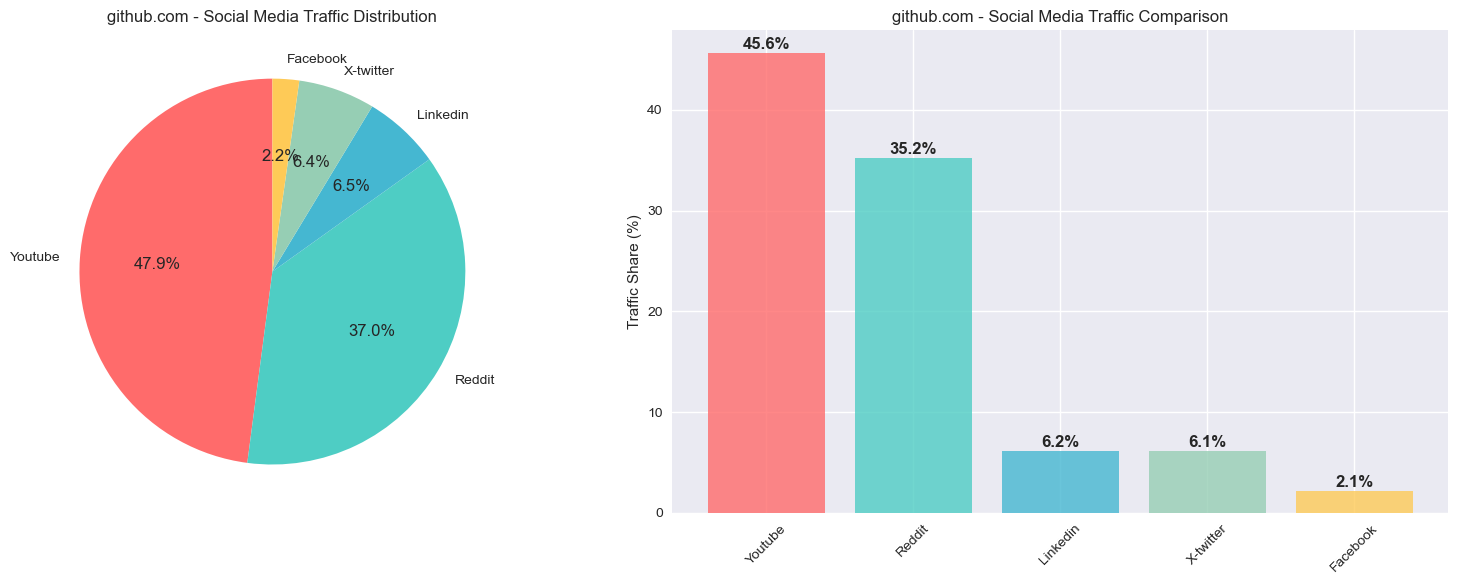



📱 linkedin.com - Social Network Distribution:
--------------------------------------------------
  1. Youtube: 45.54%
  2. Facebook: 17.46%
  3. X-twitter: 8.63%
  4. Reddit: 8.09%
  5. Instagram: 7.60%


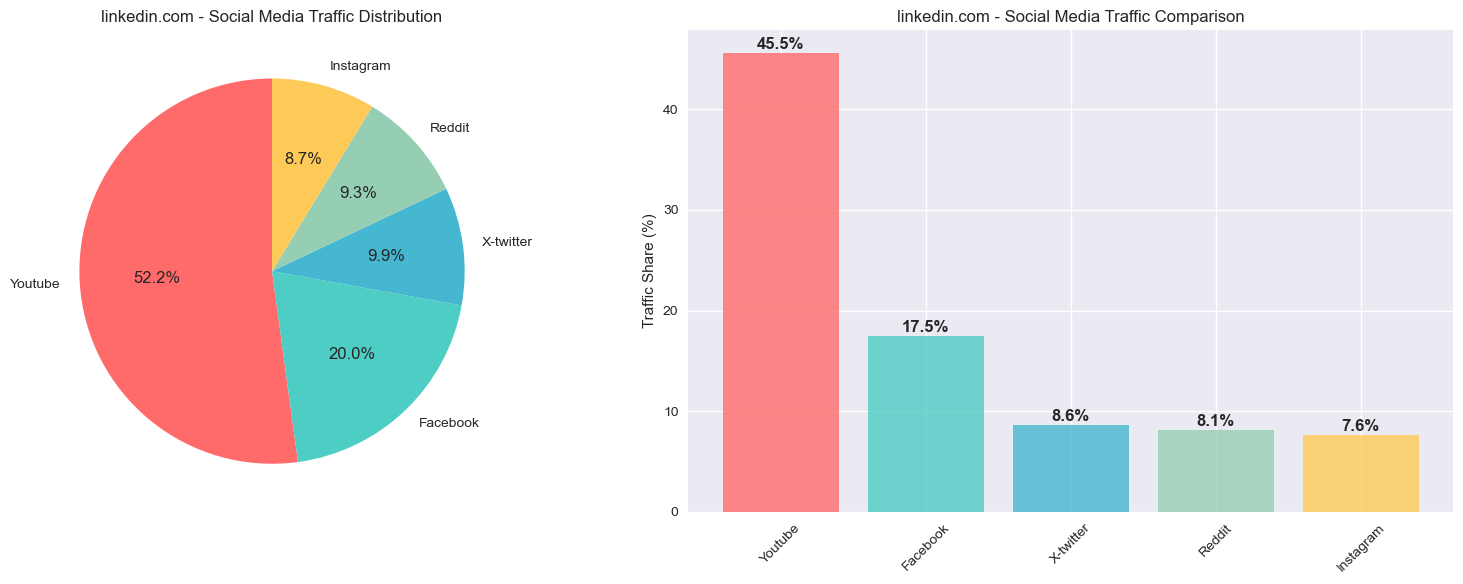



📱 medium.com - Social Network Distribution:
--------------------------------------------------
  1. Reddit: 31.18%
  2. Linkedin: 26.23%
  3. X-twitter: 13.84%
  4. Youtube: 9.67%
  5. Pinterest: 8.20%


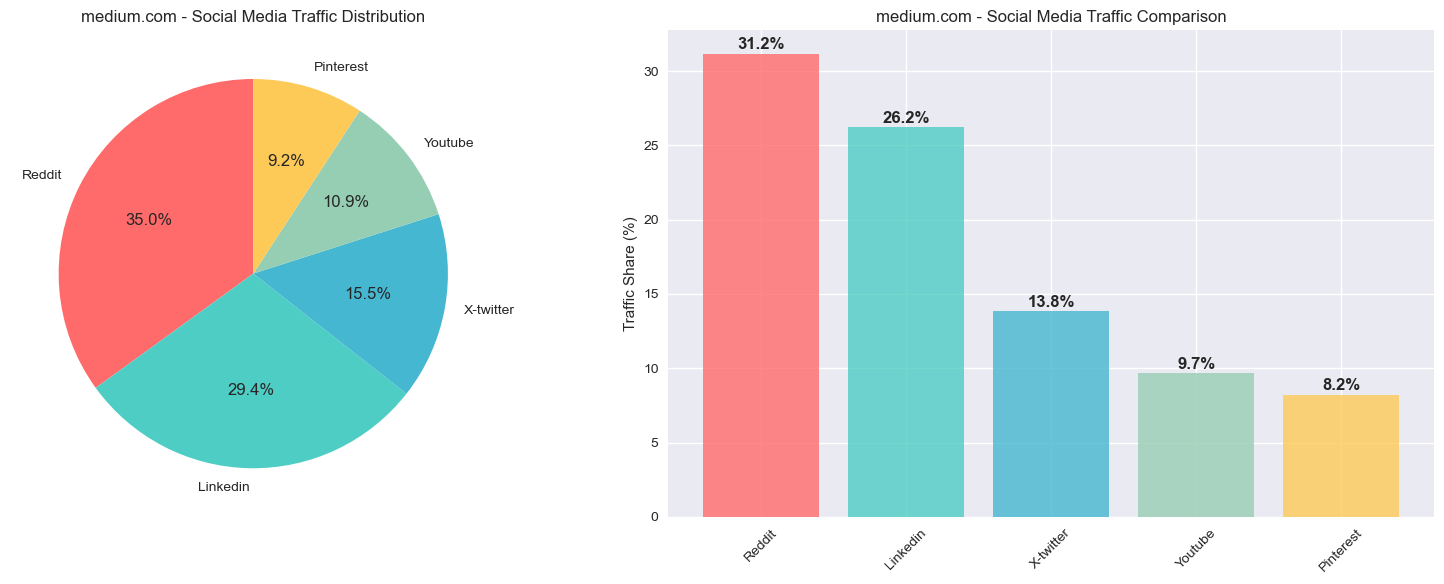

In [9]:
# Analyze social media traffic distribution
def analyze_social_networks(item):
    """Analyze and visualize social media traffic distribution"""
    domain = item.get("name", "Unknown Domain")
    social_networks = item.get("socialNetworkDistribution", [])
    
    if not social_networks:
        print(f"⚠️ No social media data available for {domain}")
        return
    
    print(f"\n📱 {domain} - Social Network Distribution:")
    print("-" * 50)
    
    # Prepare data for visualization
    networks = []
    shares = []
    
    for i, network in enumerate(social_networks[:8], 1):  # Top 8 social networks
        name = network.get('name', 'Unknown')
        share = network.get('visitsShare', 0)
        
        networks.append(name)
        shares.append(share)
        
        print(f"  {i}. {name}: {share:.2%}")
    
    # Create visualization
    if networks and shares:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Pie chart for social media distribution
        colors_social = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD']
        wedges, texts, autotexts = ax1.pie(
            shares, 
            labels=networks,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors_social[:len(networks)]
        )
        
        ax1.set_title(f'{domain} - Social Media Traffic Distribution')
        
        # Bar chart for better comparison
        bars = ax2.bar(networks, [s*100 for s in shares], color=colors_social[:len(networks)], alpha=0.8)
        ax2.set_ylabel('Traffic Share (%)')
        ax2.set_title(f'{domain} - Social Media Traffic Comparison')
        ax2.tick_params(axis='x', rotation=45)
        
        # Add percentage labels on bars
        for bar, share in zip(bars, shares):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{share:.1%}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    print()

# Analyze social media distribution for all websites
print("📱 SOCIAL MEDIA ANALYSIS")
print("=" * 60)

for item in results:
    analyze_social_networks(item)

## 10. Display Top Competitors

🏆 COMPETITOR ANALYSIS

🏆 ooredoo.tn - Top Competitors Analysis:
--------------------------------------------------
  1. tunisietelecom.tn
     Visits: 765,124 | Affinity: 1.000 | Cat. Rank: None
  2. orange.tn
     Visits: 834,544 | Affinity: 0.911 | Cat. Rank: 503
  3. google.com
     Visits: 83,796,983,693 | Affinity: 0.850 | Cat. Rank: 1
  4. google.tn
     Visits: 2,137,565 | Affinity: 0.832 | Cat. Rank: 271
  5. google.fr
     Visits: 204,787,904 | Affinity: 0.789 | Cat. Rank: 14
  6. yamli.com
     Visits: 743,831 | Affinity: 0.711 | Cat. Rank: 839
  7. bing.com
     Visits: 1,418,460,183 | Affinity: 0.710 | Cat. Rank: 4
  8. eddenyalive.com
     Visits: 200,654 | Affinity: 0.708 | Cat. Rank: 1742


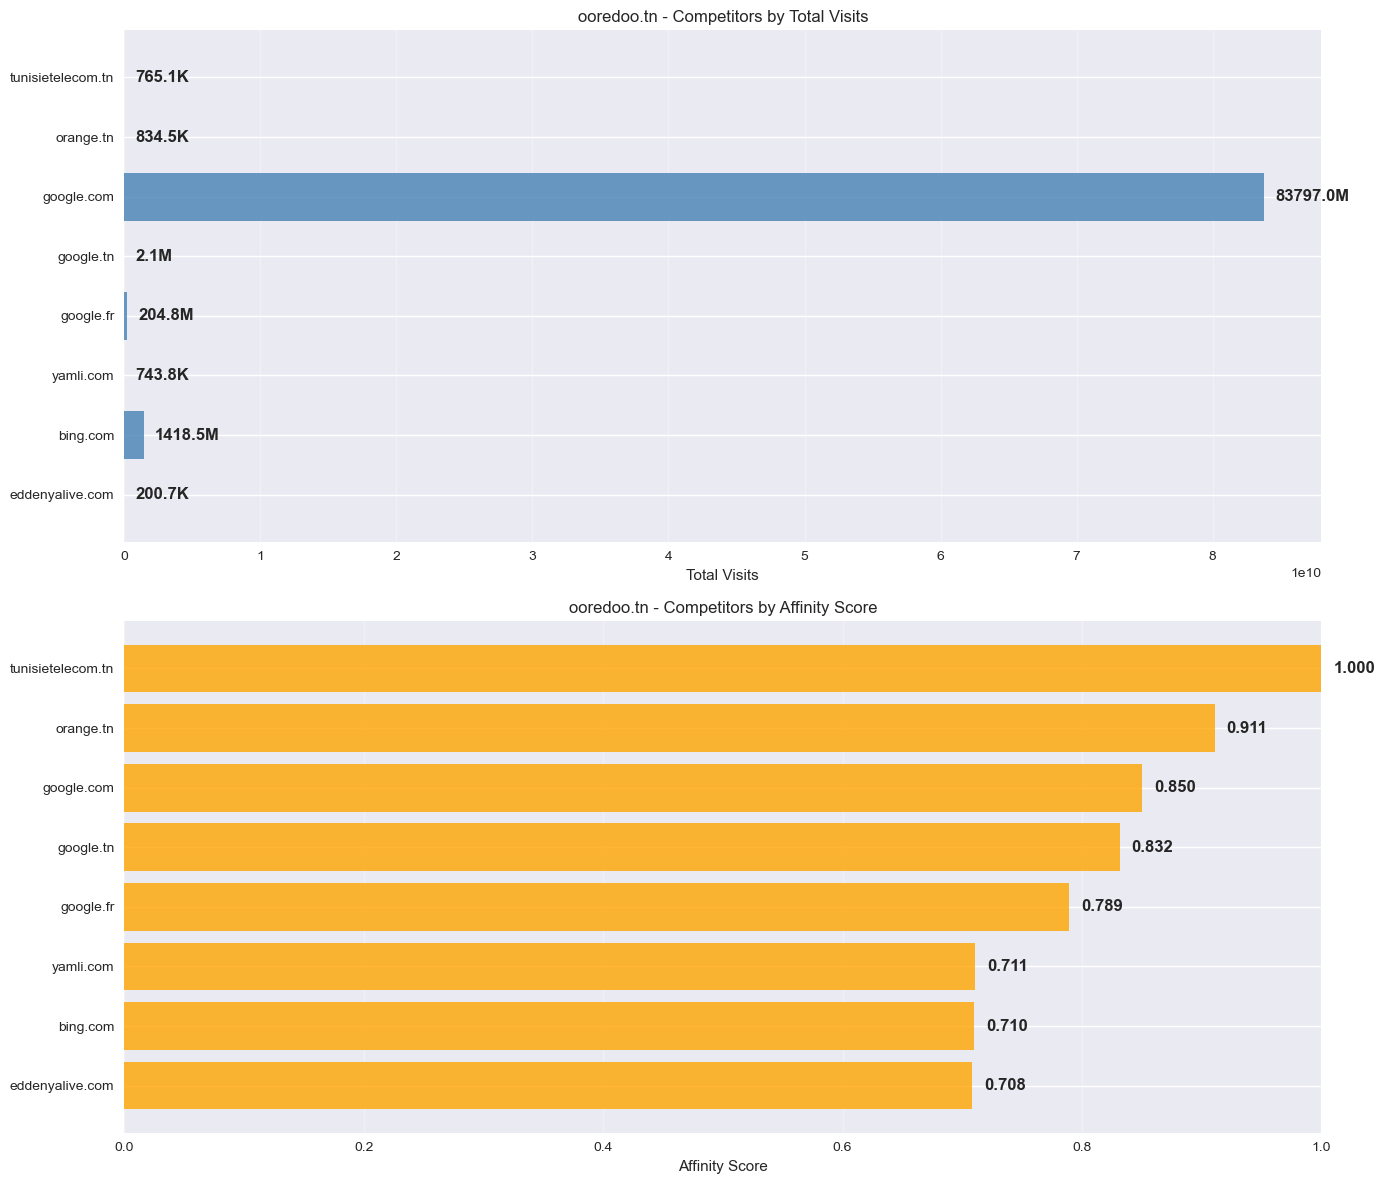


📊 WEBSITE COMPARISON OVERVIEW


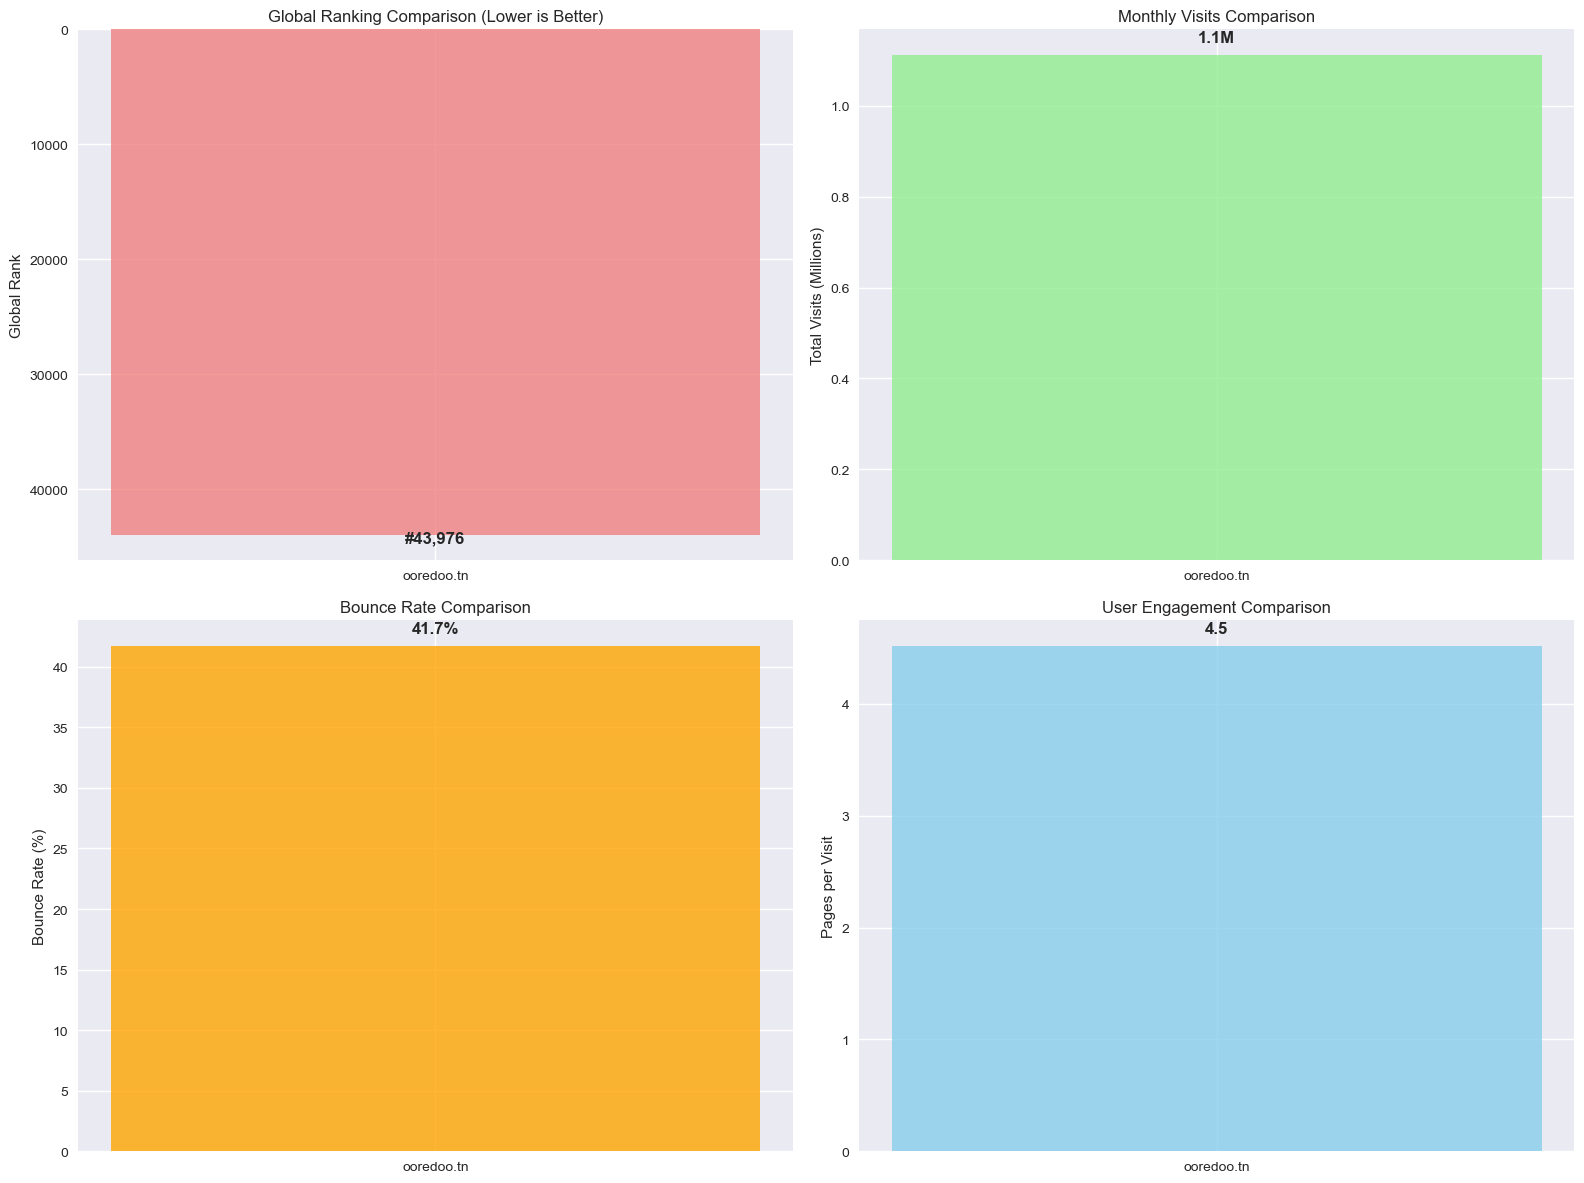


📋 Detailed Comparison Table:
    Domain  Global Rank  Total Visits  Bounce Rate  Pages/Visit
ooredoo.tn        43976       1112520     0.417454         4.52


In [9]:
# Analyze competitor landscape
def analyze_competitors(item):
    """Analyze and visualize competitor information"""
    domain = item.get("name", "Unknown Domain")
    competitors = item.get("topSimilarityCompetitors", [])
    
    if not competitors:
        print(f"⚠️ No competitor data available for {domain}")
        return
    
    print(f"\n🏆 {domain} - Top Competitors Analysis:")
    print("-" * 50)
    
    # Prepare data for visualization
    competitor_domains = []
    visit_counts = []
    affinities = []
    
    for i, competitor in enumerate(competitors[:8], 1):  # Top 8 competitors
        comp_domain = competitor.get('domain', 'Unknown')
        visits = competitor.get('visitsTotalCount', 0)
        affinity = competitor.get('affinity', 0)
        category_rank = competitor.get('categoryRank', 'N/A')
        
        competitor_domains.append(comp_domain)
        visit_counts.append(visits)
        affinities.append(affinity)
        
        print(f"  {i}. {comp_domain}")
        print(f"     Visits: {visits:,} | Affinity: {affinity:.3f} | Cat. Rank: {category_rank}")
    
    # Create competitor visualizations
    if competitor_domains and visit_counts:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
        
        # Visits comparison chart
        bars1 = ax1.barh(competitor_domains[::-1], visit_counts[::-1], color='steelblue', alpha=0.8)
        ax1.set_xlabel('Total Visits')
        ax1.set_title(f'{domain} - Competitors by Total Visits')
        ax1.grid(axis='x', alpha=0.3)
        
        # Add visit labels
        for bar, visits in zip(bars1, visit_counts[::-1]):
            label = f'{visits/1e6:.1f}M' if visits >= 1e6 else f'{visits/1e3:.1f}K' if visits >= 1e3 else str(visits)
            ax1.text(bar.get_width() + max(visit_counts) * 0.01, 
                    bar.get_y() + bar.get_height()/2, 
                    label, va='center', fontweight='bold')
        
        # Affinity comparison chart
        bars2 = ax2.barh(competitor_domains[::-1], affinities[::-1], color='orange', alpha=0.8)
        ax2.set_xlabel('Affinity Score')
        ax2.set_title(f'{domain} - Competitors by Affinity Score')
        ax2.grid(axis='x', alpha=0.3)
        ax2.set_xlim(0, 1)
        
        # Add affinity labels
        for bar, affinity in zip(bars2, affinities[::-1]):
            ax2.text(bar.get_width() + 0.01, 
                    bar.get_y() + bar.get_height()/2, 
                    f'{affinity:.3f}', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    print()

# Create a comparison chart of all three websites
def create_website_comparison():
    """Create a comparison chart of all analyzed websites"""
    print("📊 WEBSITE COMPARISON OVERVIEW")
    print("=" * 60)
    
    # Prepare comparison data
    comparison_data = []
    for item in results:
        comparison_data.append({
            'Domain': item.get('name', 'Unknown'),
            'Global Rank': item.get('globalRank', 0),
            'Total Visits': item.get('totalVisits', 0),
            'Bounce Rate': item.get('bounceRate', 0),
            'Pages/Visit': float(str(item.get('pagesPerVisit', 0)).replace(',', '')) if item.get('pagesPerVisit') else 0
        })
    
    if not comparison_data:
        return
    
    df = pd.DataFrame(comparison_data)
    
    # Create comparison visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Global Rank comparison (lower is better)
    bars1 = ax1.bar(df['Domain'], df['Global Rank'], color='lightcoral', alpha=0.8)
    ax1.set_ylabel('Global Rank')
    ax1.set_title('Global Ranking Comparison (Lower is Better)')
    ax1.invert_yaxis()  # Invert so lower ranks appear higher
    for bar, rank in zip(bars1, df['Global Rank']):
        if rank > 0:
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(df['Global Rank']) * 0.02, 
                    f'#{rank:,}', ha='center', va='bottom', fontweight='bold')
    
    # Total Visits comparison
    bars2 = ax2.bar(df['Domain'], df['Total Visits']/1e6, color='lightgreen', alpha=0.8)
    ax2.set_ylabel('Total Visits (Millions)')
    ax2.set_title('Monthly Visits Comparison')
    for bar, visits in zip(bars2, df['Total Visits']):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(df['Total Visits']/1e6) * 0.02, 
                f'{visits/1e6:.1f}M', ha='center', va='bottom', fontweight='bold')
    
    # Bounce Rate comparison
    bars3 = ax3.bar(df['Domain'], df['Bounce Rate']*100, color='orange', alpha=0.8)
    ax3.set_ylabel('Bounce Rate (%)')
    ax3.set_title('Bounce Rate Comparison')
    for bar, rate in zip(bars3, df['Bounce Rate']):
        if rate > 0:
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(df['Bounce Rate']*100) * 0.02, 
                    f'{rate*100:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Pages per Visit comparison
    bars4 = ax4.bar(df['Domain'], df['Pages/Visit'], color='skyblue', alpha=0.8)
    ax4.set_ylabel('Pages per Visit')
    ax4.set_title('User Engagement Comparison')
    for bar, pages in zip(bars4, df['Pages/Visit']):
        if pages > 0:
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(df['Pages/Visit']) * 0.02, 
                    f'{pages:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Display comparison table
    print("\n📋 Detailed Comparison Table:")
    print(df.to_string(index=False))

# Analyze competitors for all websites
print("🏆 COMPETITOR ANALYSIS")
print("=" * 60)

for item in results:
    analyze_competitors(item)

# Create website comparison
create_website_comparison()